#### importing library

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import  WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import  KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import umap.umap_ as umap

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data=pd.read_csv("people_wiki.csv")

In [4]:
data

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...,...
59066,<http://dbpedia.org/resource/Olari_Elts>,Olari Elts,olari elts born april 27 1971 in tallinn eston...
59067,<http://dbpedia.org/resource/Scott_F._Crago>,Scott F. Crago,scott francis crago born july 26 1963 twin bro...
59068,<http://dbpedia.org/resource/David_Cass_(footb...,David Cass (footballer),david william royce cass born 27 march 1962 in...
59069,<http://dbpedia.org/resource/Keith_Elias>,Keith Elias,keith hector elias born february 3 1972 in lac...


In [5]:
data['text']

0        digby morrell born 10 october 1979 is a former...
1        alfred j lewy aka sandy lewy graduated from un...
2        harpdog brown is a singer and harmonica player...
3        franz rottensteiner born in waidmannsfeld lowe...
4        henry krvits born 30 december 1974 in tallinn ...
                               ...                        
59066    olari elts born april 27 1971 in tallinn eston...
59067    scott francis crago born july 26 1963 twin bro...
59068    david william royce cass born 27 march 1962 in...
59069    keith hector elias born february 3 1972 in lac...
59070    fawaz mohammed damrah arabic fawwz damra was t...
Name: text, Length: 59071, dtype: object

### Preprocessing

In [6]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [7]:
data['processed_text'] = data["text"].apply(preprocess_text)

In [8]:
# Apply tokenization using lambda
data['token'] = data['processed_text'].apply(lambda text: word_tokenize(text))

In [9]:
data

,URI,name,text,processed_text,token
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,digby morrell born october is a former austral...,"[digby, morrell, born, october, is, a, former,..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,alfred j lewy aka sandy lewy graduated from un...,"[alfred, j, lewy, aka, sandy, lewy, graduated,..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,harpdog brown is a singer and harmonica player...,"[harpdog, brown, is, a, singer, and, harmonica..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,franz rottensteiner born in waidmannsfeld lowe...,"[franz, rottensteiner, born, in, waidmannsfeld..."
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,henry krvits born december in tallinn better k...,"[henry, krvits, born, december, in, tallinn, b..."
...,...,...,...,...,...
59066,<http://dbpedia.org/resource/Olari_Elts>,Olari Elts,olari elts born april 27 1971 in tallinn eston...,olari elts born april in tallinn estonia is an...,"[olari, elts, born, april, in, tallinn, estoni..."
59067,<http://dbpedia.org/resource/Scott_F._Crago>,Scott F. Crago,scott francis crago born july 26 1963 twin bro...,scott francis crago born july twin brother to ...,"[scott, francis, crago, born, july, twin, brot..."
59068,<http://dbpedia.org/resource/David_Cass_(footb...,David Cass (footballer),david william royce cass born 27 march 1962 in...,david william royce cass born march in forest ...,"[david, william, royce, cass, born, march, in,..."
59069,<http://dbpedia.org/resource/Keith_Elias>,Keith Elias,keith hector elias born february 3 1972 in lac...,keith hector elias born february in lacey town...,"[keith, hector, elias, born, february, in, lac..."


In [10]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Directly remove stopwords from the tokenized list
data['token_without_stopwords'] = data['token'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)


In [11]:
data

,URI,name,text,processed_text,token,token_without_stopwords
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,digby morrell born october is a former austral...,"[digby, morrell, born, october, is, a, former,...","[digby, morrell, born, october, former, austra..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,alfred j lewy aka sandy lewy graduated from un...,"[alfred, j, lewy, aka, sandy, lewy, graduated,...","[alfred, j, lewy, aka, sandy, lewy, graduated,..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,harpdog brown is a singer and harmonica player...,"[harpdog, brown, is, a, singer, and, harmonica...","[harpdog, brown, singer, harmonica, player, ac..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,franz rottensteiner born in waidmannsfeld lowe...,"[franz, rottensteiner, born, in, waidmannsfeld...","[franz, rottensteiner, born, waidmannsfeld, lo..."
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,henry krvits born december in tallinn better k...,"[henry, krvits, born, december, in, tallinn, b...","[henry, krvits, born, december, tallinn, bette..."
...,...,...,...,...,...,...
59066,<http://dbpedia.org/resource/Olari_Elts>,Olari Elts,olari elts born april 27 1971 in tallinn eston...,olari elts born april in tallinn estonia is an...,"[olari, elts, born, april, in, tallinn, estoni...","[olari, elts, born, april, tallinn, estonia, e..."
59067,<http://dbpedia.org/resource/Scott_F._Crago>,Scott F. Crago,scott francis crago born july 26 1963 twin bro...,scott francis crago born july twin brother to ...,"[scott, francis, crago, born, july, twin, brot...","[scott, francis, crago, born, july, twin, brot..."
59068,<http://dbpedia.org/resource/David_Cass_(footb...,David Cass (footballer),david william royce cass born 27 march 1962 in...,david william royce cass born march in forest ...,"[david, william, royce, cass, born, march, in,...","[david, william, royce, cass, born, march, for..."
59069,<http://dbpedia.org/resource/Keith_Elias>,Keith Elias,keith hector elias born february 3 1972 in lac...,keith hector elias born february in lacey town...,"[keith, hector, elias, born, february, in, lac...","[keith, hector, elias, born, february, lacey, ..."


In [12]:
nltk.download('wordnet', quiet=True)
wordnet_lemmatizer = WordNetLemmatizer()


In [13]:
data['lemmatized_tokens'] = data['token_without_stopwords'].apply(
    lambda tokens: [wordnet_lemmatizer.lemmatize(token) for token in tokens]
)

In [14]:
data.iloc[:,3:]

,processed_text,token,token_without_stopwords,lemmatized_tokens
0,digby morrell born october is a former austral...,"[digby, morrell, born, october, is, a, former,...","[digby, morrell, born, october, former, austra...","[digby, morrell, born, october, former, austra..."
1,alfred j lewy aka sandy lewy graduated from un...,"[alfred, j, lewy, aka, sandy, lewy, graduated,...","[alfred, j, lewy, aka, sandy, lewy, graduated,...","[alfred, j, lewy, aka, sandy, lewy, graduated,..."
2,harpdog brown is a singer and harmonica player...,"[harpdog, brown, is, a, singer, and, harmonica...","[harpdog, brown, singer, harmonica, player, ac...","[harpdog, brown, singer, harmonica, player, ac..."
3,franz rottensteiner born in waidmannsfeld lowe...,"[franz, rottensteiner, born, in, waidmannsfeld...","[franz, rottensteiner, born, waidmannsfeld, lo...","[franz, rottensteiner, born, waidmannsfeld, lo..."
4,henry krvits born december in tallinn better k...,"[henry, krvits, born, december, in, tallinn, b...","[henry, krvits, born, december, tallinn, bette...","[henry, krvits, born, december, tallinn, bette..."
...,...,...,...,...
59066,olari elts born april in tallinn estonia is an...,"[olari, elts, born, april, in, tallinn, estoni...","[olari, elts, born, april, tallinn, estonia, e...","[olari, elts, born, april, tallinn, estonia, e..."
59067,scott francis crago born july twin brother to ...,"[scott, francis, crago, born, july, twin, brot...","[scott, francis, crago, born, july, twin, brot...","[scott, francis, crago, born, july, twin, brot..."
59068,david william royce cass born march in forest ...,"[david, william, royce, cass, born, march, in,...","[david, william, royce, cass, born, march, for...","[david, william, royce, cass, born, march, for..."
59069,keith hector elias born february in lacey town...,"[keith, hector, elias, born, february, in, lac...","[keith, hector, elias, born, february, lacey, ...","[keith, hector, elia, born, february, lacey, t..."


In [15]:
data['clean_text'] = data['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

In [16]:
data['clean_text'] = data['clean_text'].apply(lambda text: ' '.join(text.split()[2:]))

In [17]:
data["clean_text"]

0        born october former australian rule footballer...
1        lewy aka sandy lewy graduated university chica...
2        singer harmonica player active canada blue sce...
3        born waidmannsfeld lower austria austria janua...
4        born december tallinn better known stagename g...
                               ...                        
59066    born april tallinn estonia estonian conductor ...
59067    crago born july twin brother jeff crago americ...
59068    royce cass born march forest gate london engli...
59069    elia born february lacey township new jersey f...
59070    damrah arabic fawwz damra imam islamic center ...
Name: clean_text, Length: 59071, dtype: object

### Vectorization(TF-IDF)

In [18]:

vectorizer = TfidfVectorizer()
doc_term_matrix = vectorizer.fit_transform(data["clean_text"])

In [19]:
print(doc_term_matrix)

  (0, 267192)	0.05753008898649782
  (0, 84623)	0.0299559892321978
  (0, 314921)	0.07563271874106743
  (0, 126165)	0.040620741413815456
  (0, 324519)	0.05896605944947051
  (0, 419166)	0.05214985156852099
  (0, 100274)	0.031045388103052098
  (0, 125622)	0.1331618645275906
  (0, 13303)	0.01724396024151442
  (0, 83147)	0.1038619349990734
  (0, 82698)	0.058846681762002265
  (0, 389874)	0.02878121383871546
  (0, 335577)	0.0646948503993922
  (0, 116120)	0.04417740390672857
  (0, 335545)	0.054305754551000784
  (0, 115731)	0.044065902753873065
  (0, 135418)	0.08265341407834434
  (0, 407536)	0.11203494364912851
  (0, 357728)	0.056736557710672354
  (0, 181574)	0.07361820917369874
  (0, 186369)	0.05302602412065913
  (0, 53346)	0.06451885968378394
  (0, 385817)	0.07817451245556287
  (0, 82645)	0.08637404118270238
  (0, 26498)	0.04145514475222517
  :	:
  (59070, 238928)	0.04995256931804793
  (59070, 332755)	0.036705367092300635
  (59070, 419272)	0.04818719551763675
  (59070, 355760)	0.10968866067801

### Dimential reduction(LDA+UMAP)

In [ ]:
lda_model = LatentDirichletAllocation(
            n_components=10,
            random_state=42,
            learning_method='online'
        )
topic_dist = lda_model.fit_transform(doc_term_matrix)

In [ ]:
tsne = umap.UMAP(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(topic_dist)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
silhouette_scores = []
max_clusters = 15

for n_clusters in range(2, max_clusters + 1):
                kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
                cluster_labels = kmeans.fit_predict(X_tsne)

                # Compute silhouette score
                try:
                    score = silhouette_score(X_tsne, cluster_labels)
                    silhouette_scores.append(score)
                except Exception:
                    silhouette_scores.append(-1)

            # Find optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2



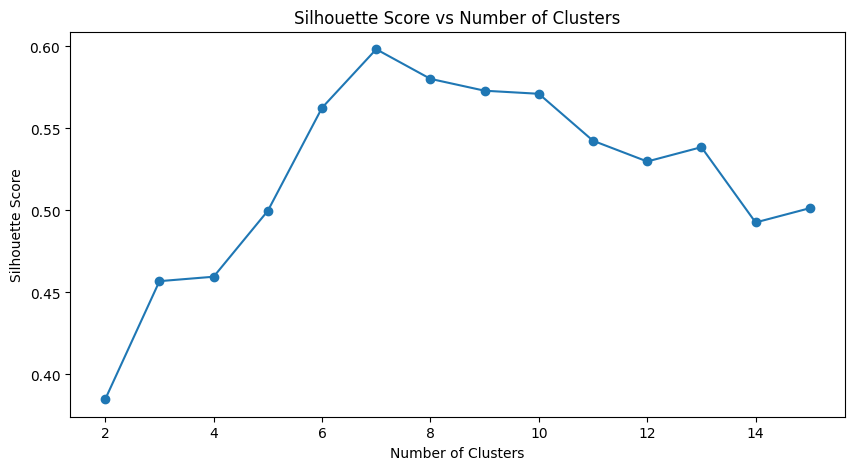

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
wcss = []  # Within-Cluster Sum of Squares (WCSS)
K = range(2, 15)  # Try clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tsne)
    wcss.append(kmeans.inertia_)

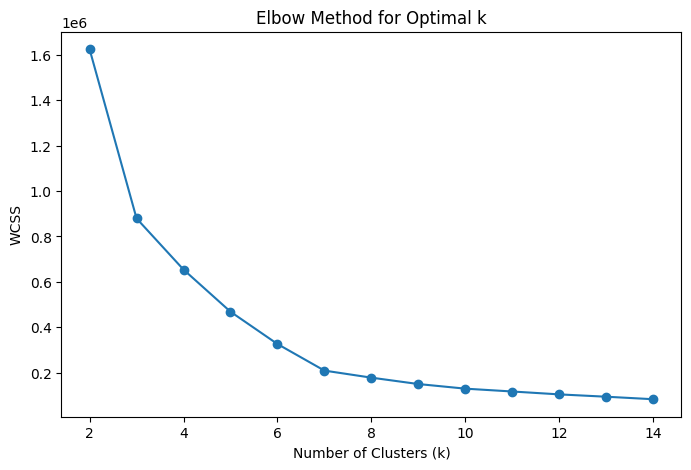

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_tsne)

# Step 4: Evaluate using Silhouette Score
silhouette = silhouette_score(X_tsne, clusters)
print(f"K-Means Silhouette Score (UMAP-reduced LDA topics): {silhouette:.4f}")

# Step 5: Store results
data["lda_umap_cluster"] = clusters

K-Means Silhouette Score (UMAP-reduced LDA topics): 0.4569


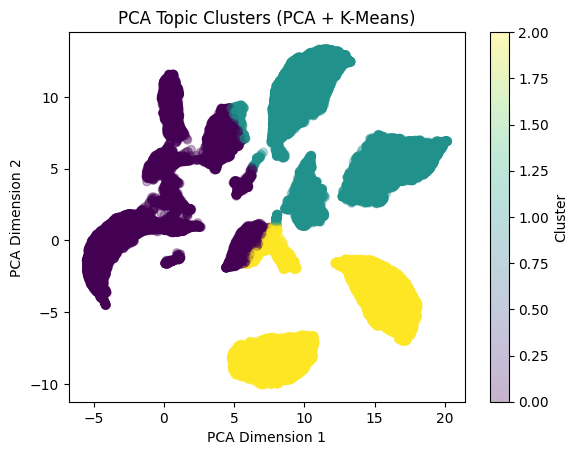

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.3)
plt.colorbar(label="Cluster")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("PCA Topic Clusters (PCA + K-Means)")
plt.show()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


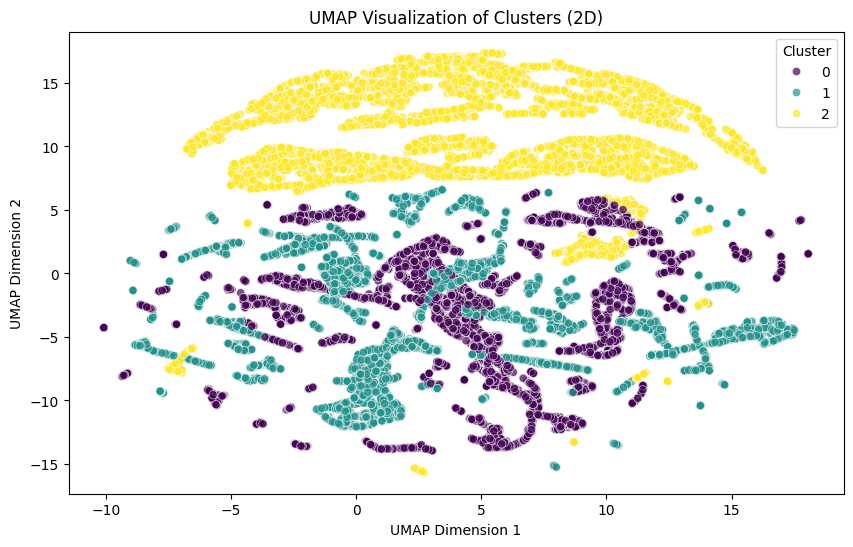

In [ ]:
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_tsne)  # topic_umap is your feature matrix

# Plot the UMAP results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_umap_2d[:, 0], y=X_umap_2d[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.title("UMAP Visualization of Clusters (2D)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Cluster")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


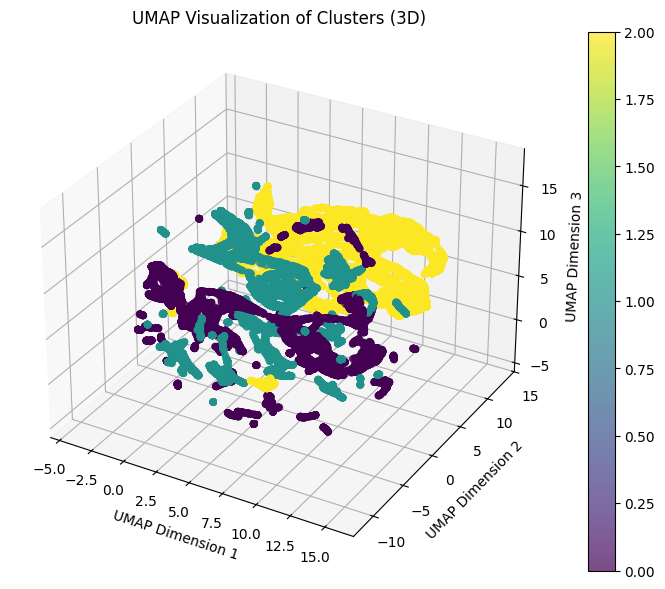

In [ ]:
import umap
from mpl_toolkits.mplot3d import Axes3D

# Apply UMAP for dimensionality reduction to 3D
umap_3d = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_3d.fit_transform(X_tsne)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2], c=clusters, cmap='viridis', alpha=0.7)

ax.set_title("UMAP Visualization of Clusters (3D)")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")
plt.colorbar(sc)
plt.show()
